<a href="https://colab.research.google.com/github/TheFaheem/Personal-ML-Projects/blob/Main/Machine%20Learning%20Projects/Heart%20Disease%20Prediction/Heart_Disease_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing The Dependencies**

In [202]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score

### **Converting The CSV File into Pandas Dataframe**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
heart_data = pd.read_csv('/content/drive/MyDrive/Datasets/heart_disease_data.csv')

### **First 5 rows of the Dataframe**

In [4]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### **Last 5 Rows of The DataFrame:**

In [5]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### **Information About The DataFrame**

In [6]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### **Cleaning and Analyzing The Dataframe**

In [7]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [43]:
x = heart_data.drop(columns = 'target', axis=1)
y = heart_data['target']

In [44]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [45]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### **Splitting The Dataframe into Training Data and Test Data**

In [164]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [165]:
print(x_train.shape, x_test.shape,  y_train.shape, y_test.shape)

(242, 13) (61, 13) (242,) (61,)


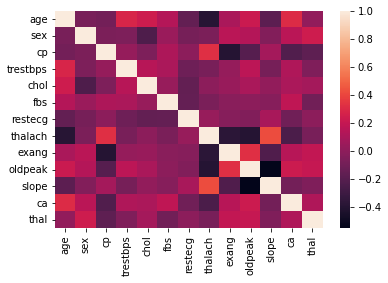

In [167]:
sns.heatmap(x_train.corr())

In [166]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
61,54,1,1,108,309,0,1,156,0,0.0,2,0,3
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3


In [219]:
scaler = MinMaxScaler()

In [220]:
x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_test = pd.DataFrame(scaler.transform(x_test))

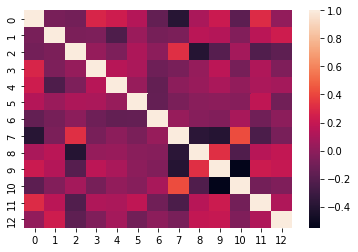

In [221]:
sns.heatmap(x_train.corr())

In [222]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.465116,1.0,0.333333,0.142857,0.411085,0.0,0.5,0.635514,0.0,0.000000,1.0,0.00,1.0
1,1.000000,1.0,0.000000,0.316327,0.399538,0.0,0.0,0.691589,1.0,0.000000,1.0,0.75,0.5
2,0.511628,1.0,0.333333,0.265306,0.251732,0.0,0.5,0.757009,0.0,0.000000,0.0,0.00,0.5
3,0.558140,1.0,0.333333,0.316327,0.205543,0.0,0.5,0.523364,0.0,0.071429,0.5,1.00,1.0
4,0.488372,0.0,0.000000,0.346939,0.170901,0.0,1.0,0.392523,1.0,0.357143,0.5,0.25,1.0


## **Model Training**

## **Using Logistic Regression**

In [235]:
model = LogisticRegression()

## **Fitting The Data**

In [236]:
model.fit(x_train, y_train)

LogisticRegression()

### **Accuracy Scores of Training Data and Test Data**

In [237]:
x_train_prediction = model.predict(x_train)
x_train_accuracy = accuracy_score(x_train_prediction, y_train)

In [238]:
print('Accuracy on Training Data',x_train_accuracy)

Accuracy on Training Data 0.8553719008264463


In [239]:
x_test_prediction = model.predict(x_test)
x_test_accuracy = accuracy_score(x_test_prediction, y_test)

In [240]:
print('Accuracy on Test Data',x_test_accuracy)

Accuracy on Test Data 0.8032786885245902


## **Predictive System**

# **0 ==> Healthy Heart**
# **1 ==> Defective Heart**

## **Giving Input From The Dataset To Check Whether Our Model Prediction Correct or Not:**

In [ ]:
input_data = (55,1,0,132,353,0,1,132,1,1.2,1,1,3)

# Turning Input Data into numpy Array
input_data_array= np.asarray(input_data)

# Reshapping The array To Tell The Model That We are Trying To Find The Prediction For One Value
reshaped_input_data = input_data_array.reshape(1,-1)

# Predicting The Value
predicted_value = model.predict(reshaped_input_data)
print(predicted_value)

# Condition For Output
if predicted_value[0]==0:
  print('Congratulation! You Have a Healthy Heart')
else:
  print('You Have a Defective Heart')

  # There will be a simple Warning Message Down There. Don't Worry About it. it Does Not Affect our Output or Workflow

[0]
Congratulation! You Have a Healthy Heart


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
